## IRIS FLOWER CLASSIFICATION

The Iris dataset is a popular dataset for introductory machine learning tasks. In this project, we aim to classify Iris flowers into different species based on their sepal and petal measurements.

### Data Exploration and Visualization

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris_df = pd.read_csv(r'IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


After loading the dataset, we visualize the distribution of different species and the relationships between features.

Text(0.5, 1.02, 'Pair Plot of Iris Dataset')

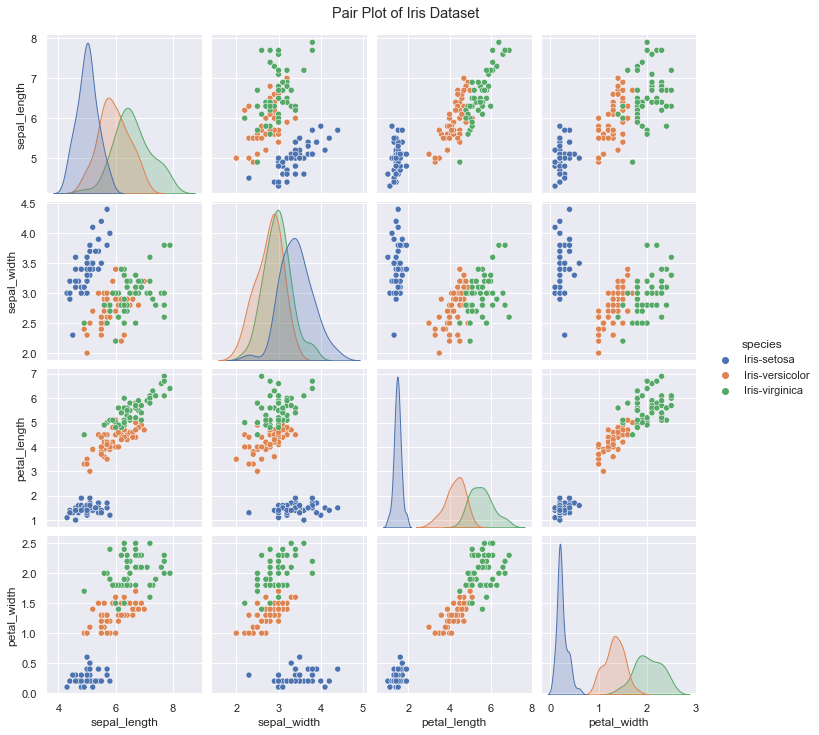

In [29]:
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)

In [30]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
iris_df.shape

(150, 5)

In [32]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [33]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

### Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Training and evaluating each model
model_accuracies = {}

for name, clf in classifiers.items():
    # Training the model
    clf.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = clf.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

model_accuracies

{'Logistic Regression': 1.0,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'SVM': 1.0,
 'k-NN': 1.0}

### Evaluation

In [36]:
# so we tested accuracy of all classification models possible for our dataset so we can pick one of them as all are performing well so i will choose SVM
from sklearn.svm import SVC # "Support vector classifier"

y_pred=classifiers['SVM'].predict(X_test)

In [37]:
len(y_pred)

30

In [38]:
# Comparing outcomes of Original dataset and the outcome(prediction) of the model
y= pd.DataFrame({'Original': y_test,'Predicted': y_pred})
y

,Original,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [39]:
y.head()

,Original,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


In [40]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


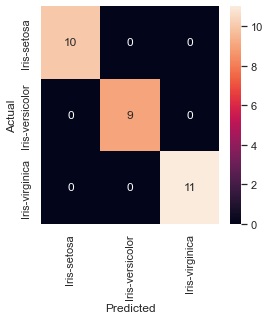

In [41]:
plt1()

In [42]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [46]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:", metrics.recall_score(y_test, y_pred, average='macro'))   # positive accuracy
    print("Specificity:", TN / (TN + FP))  # negative accuracy for one class (not typically used in multiclass)
    print("Precision (macro):", metrics.precision_score(y_test, y_pred, average='macro'))
    print("Classification Error:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False Positive Rate:", 1 - TN / (TN + FP))
    print('###########################################')

EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision (macro): 1.0
Classification Error: 0.0
False Positive Rate: 0.0
###########################################


In [50]:
# get total number of 0 in the actual dataset
count0 = iris_df['species'][iris_df.species==0].count()

# get total number of 0 in the actual dataset
count1 = iris_df['species'][iris_df.species==1].count()

print("Actual Dataset")
print("0's:", count0)
print("1's:", count1)

Actual Dataset
0's: 0
1's: 0


## Conclusion

The models trained on the Iris dataset achieved outstanding performance. This dataset is beginner-friendly and provides a great introduction to classification tasks.